# Restaurant Food Cost Case Study

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

## FEATURES:
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

# Problem Statement
We need to predict Cost of restaurants for 2 person, it's an regression problem.

# EDA

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
restaurant_train_df=pd.read_excel('Restaurant_Data_Train.xlsx')

In [3]:
restaurant_test_df=pd.read_excel('Restaurant_Data_Test.xlsx')

In [4]:
restaurant_train_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [5]:
    restaurant_test_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [6]:
print(restaurant_train_df.shape)
print(restaurant_test_df.shape)

(12690, 9)
(4231, 8)


The COST column is missing in test df as expected

In [7]:
restaurant_train_df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Almost all the columns are of object type so we would need to encode them before training our model.

In [8]:
restaurant_train_df.duplicated().sum()

25

Checking duplicate instances shows that we would need to delete the duplicates.

In [9]:
restaurant_train_df=restaurant_train_df.drop_duplicates()

Lets check the null values in the train df

In [10]:
restaurant_train_df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

Since there are more than 12k rows in our dataset so if we remove the null values then we would not loose much of our data in quantity.

In [11]:
restaurant_train_df = restaurant_train_df.dropna()

In [12]:
restaurant_train_df["VOTES"] = restaurant_train_df["VOTES"].str.split()
restaurant_train_df["VOTES"] = restaurant_train_df["VOTES"].str[0].astype("int")
restaurant_train_df['RATING']=pd.to_numeric(restaurant_train_df['RATING'])

Storing vote counts only and Type casting features VOTES and RATING. 

In [13]:
restaurant_train_df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
COST               int64
dtype: object

ID and City are not useful as locality will be much of valuable information, so removing features Restaurant ID and City

In [14]:
restaurant_train_df = restaurant_train_df.drop(['RESTAURANT_ID','CITY'], axis=1)

In [15]:
restaurant_train_df.head()

,TITLE,CUISINES,TIME,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Lower Parel,3.8,165,300


In [16]:
restaurant_train_df.describe()

,RATING,VOTES,COST
count,11372.000000,11372.000000,11372.000000
mean,3.784075,416.953394,682.770049
std,0.422101,846.113843,647.315941
min,2.000000,4.000000,50.000000
25%,3.500000,57.000000,300.000000
50%,3.800000,163.000000,500.000000
75%,4.100000,457.250000,800.000000
max,4.900000,41186.000000,14000.000000


VOTES Feature is left skewed. Outliers are present. But this feature is important.

possibly restaraunts with max vote counts are more famous.

In [17]:
print(restaurant_train_df['TIME'].value_counts())
print(len(list(restaurant_train_df['TIME'].value_counts())))

11am – 11pm (Mon-Sun)                                   1246
12noon – 12midnight (Mon-Sun)                            433
12noon – 11pm (Mon-Sun)                                  381
11am – 12midnight (Mon-Sun)                              277
12noon – 1am (Mon-Sun)                                   188
                                                        ... 
6am – 8:30pm (Mon-Sat),6am – 12noon (Sun)                  1
7pm – 11pm (Mon),9:30am – 4pm, 6pm – 10:45pm...            1
8am – 11pm (Mon, Tue, Thu, Fri, Sat, Sun), Closed...       1
9am – 11pm (Mon-Sat),3pm – 11pm (Sun)                      1
6:30pm – 10:30pm (Mon),11:30am – 3:30pm, 7pm –...          1
Name: TIME, Length: 2543, dtype: int64
2543


There are 2543 different values of time

In [18]:
print(restaurant_train_df['TITLE'].value_counts())
print(len(list(restaurant_train_df['TITLE'].value_counts())))

QUICK BITES                     3668
CASUAL DINING                   3392
None                             798
CAFÉ                             542
DESSERT PARLOR                   340
                                ... 
CASUAL DINING,DESSERT PARLOR       1
SWEET SHOP,CONFECTIONERY           1
DESSERT PARLOR,PAAN SHOP           1
LOUNGE,FINE DINING                 1
DESSERT PARLOR,KIOSK               1
Name: TITLE, Length: 111, dtype: int64
111


There are 111 types of titles

In [19]:
print(restaurant_train_df['CUISINES'].value_counts())
print(len(list(restaurant_train_df['CUISINES'].value_counts())))

North Indian, Chinese                                                       457
South Indian                                                                456
North Indian                                                                447
Fast Food                                                                   238
Chinese                                                                     155
                                                                           ... 
Continental, Finger Food, South Indian, North Indian, Chinese, Beverages      1
Continental, Finger Food, Pizza                                               1
Goan                                                                          1
Continental, Finger Food, Asian, North Indian                                 1
Salad, Continental, Healthy Food, Mediterranean, Pizza                        1
Name: CUISINES, Length: 3913, dtype: int64
3913


There are 3913 different types of cuisines

Title will be an valuable information, since it represents the king of CUISINES it will carry within.

In [20]:
# Feature Engineering
# Creating a new feature representing day or night restaurants.
def Create_newFeatureDNRest(TimeInst):
    D=""
    N=""
    sOutputStr=""
    if "am" in str(TimeInst):
        D="D"
    if "pm" in str(TimeInst):
        N="N"
    sOutputStr=D+N
    return(sOutputStr)

In [21]:
restaurant_train_df['TIME']=pd.DataFrame(map(str,restaurant_train_df['TIME']))

In [22]:
restaurant_train_df['DAY AND NIGHT']=pd.Series(map(Create_newFeatureDNRest,restaurant_train_df['TIME']))

In [23]:
restaurant_train_df['DAY AND NIGHT'].value_counts()

DN    4909
N     2072
D     1617
      1613
Name: DAY AND NIGHT, dtype: int64

Some rows in the dataset are not having time values. 

In [24]:
restaurant_train_df['RATING'].value_counts()

3.9    1231
3.8    1181
4.0    1087
3.7    1077
3.6     940
4.1     923
3.5     759
4.2     714
3.4     569
4.3     553
3.3     363
4.4     359
3.2     265
4.5     196
2.9     186
3.1     185
3.0     169
2.8     146
4.6     134
2.7      89
4.7      65
2.6      61
2.5      35
4.8      31
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

The rating are ranging from 2.0 to 4.9

In [25]:
restaurant_train_df.head()

,TITLE,CUISINES,TIME,LOCALITY,RATING,VOTES,COST,DAY AND NIGHT
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Dombivali East,3.6,49,1200,DN
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Ramapuram,4.2,30,1500,N
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Saligramam,3.8,221,800,DN
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Bandra West,4.1,24,800,D
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Lower Parel,3.8,165,300,D


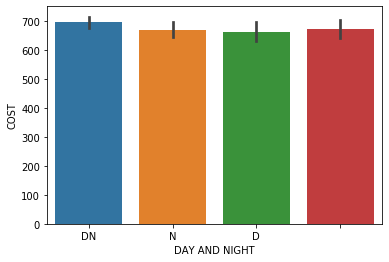

In [26]:
sns.barplot(x='DAY AND NIGHT',y='COST',data=restaurant_train_df)

It's of much no use, I can drop DAY AND NIGHT and TIME feature.

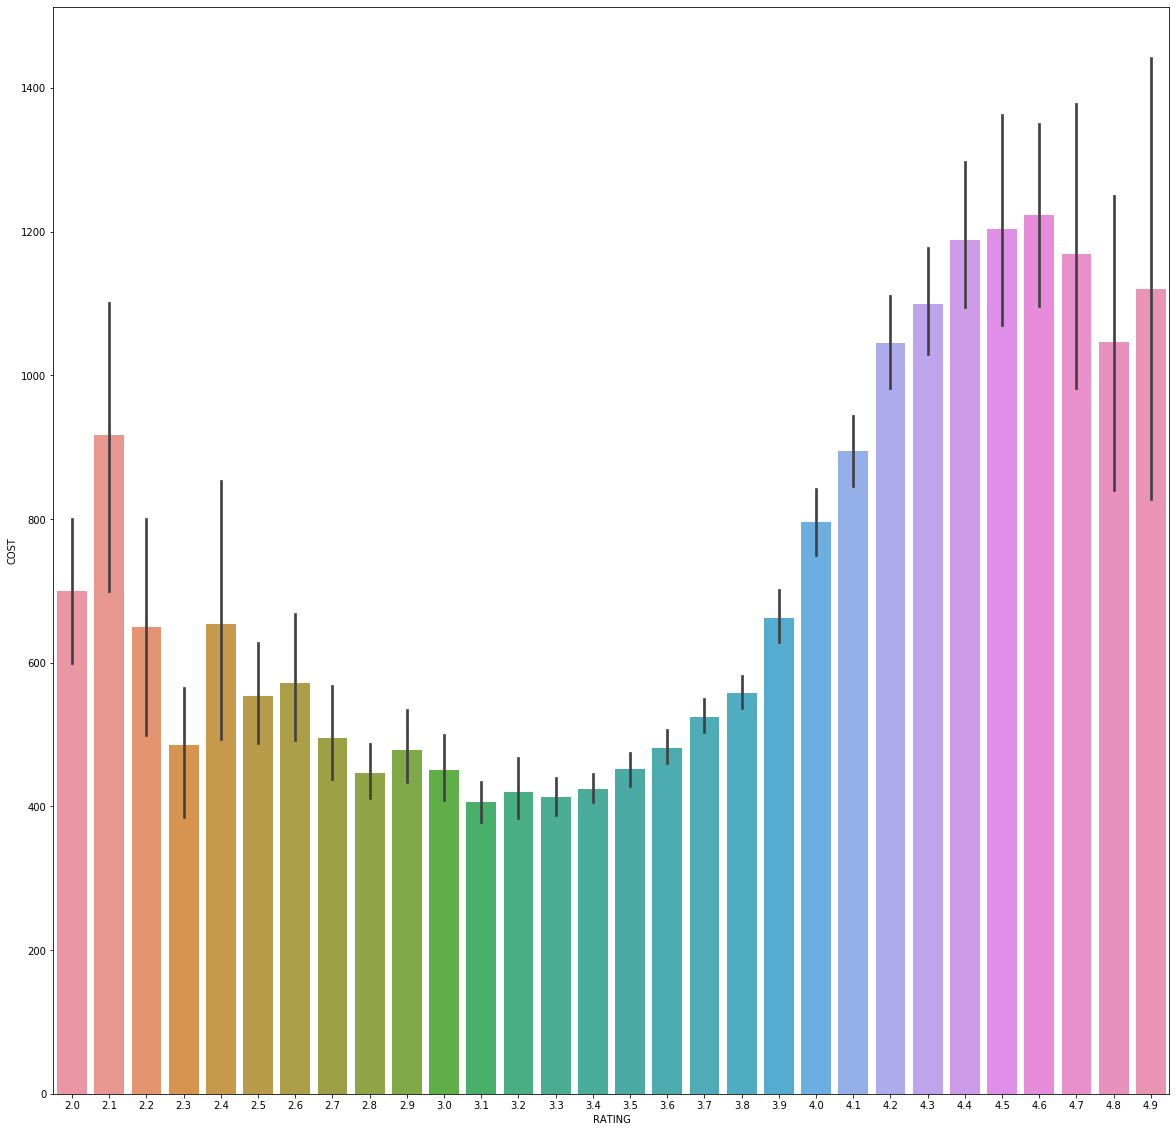

In [27]:
plt.figure(figsize=(20,20))
sns.barplot(x='RATING',y='COST',data=restaurant_train_df)

rating from 4.1 to 4.9 has more cost on average than below average, which is quite obvious.

# Bivariate Analysis

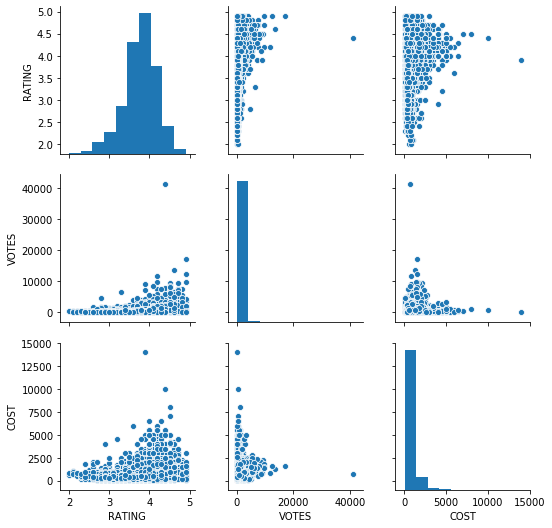

In [28]:
# Plotting pairplot
sns.pairplot(restaurant_train_df)

No features are correlated with each other. No need to remove any continuous feature

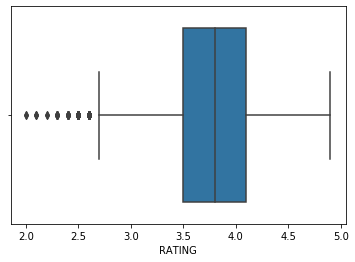

In [29]:
# Outlier Analuysis
sns.boxplot(restaurant_train_df['RATING'])

NO much outliers are there in the Rating feature, we can leave it as is.

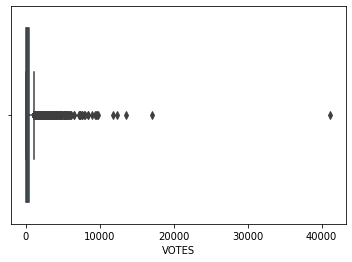

In [30]:
sns.boxplot(restaurant_train_df['VOTES'])

VOTES do have outliers but removing them will lead us to very less data

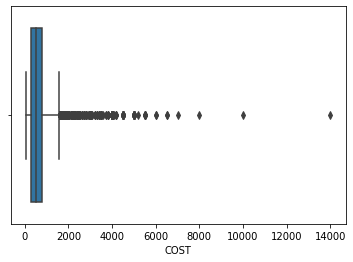

In [31]:
sns.boxplot(restaurant_train_df['COST'])

high rated restaurant might have higher cost. We will not remove any outliers.

In [32]:
corr_mat=restaurant_train_df.corr()
corr_mat

,RATING,VOTES,COST
RATING,1.000000,0.349273,0.326821
VOTES,0.349273,1.000000,0.244776
COST,0.326821,0.244776,1.000000


Cost feature is less correlated with rating and votes

Rating and votes are also not much correlated so I will not remove any feature.

# Model Selection

In [33]:
Y=restaurant_train_df['COST']
X=restaurant_train_df.drop('COST',axis=1)

In [34]:
print(X.shape)
print(Y.shape)

(11372, 7)
(11372,)


In [35]:
# Normalization
colList=['RATING','VOTES']
for col in colList:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [36]:
# Removing CUISINES, TIME and DAY AND NIGHT features
X.drop(['CUISINES','TIME','DAY AND NIGHT'],axis=1,inplace=True)

In [37]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding
X = OrdinalEncoder().fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
# Calculating root mean squared log error.
def rmlse(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [40]:
max_r2Score=0
active_r2s=0
iBest_rs=0
algoList=[LinearRegression(), DecisionTreeRegressor(), SVR(gamma='scale'), AdaBoostRegressor(), GradientBoostingRegressor(), ]
for algo in algoList:
    for iActive_rs in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs, test_size=0.2)
        lm=algo
        lm.fit(x_train,y_train)
        pred=lm.predict(x_test)
        active_r2s=rmlse(pred,y_test)
        if active_r2s>max_r2Score:
            max_r2Score=active_r2s
            iBest_rs=iActive_rs
    print("Best model {} is giving rmlse Score is {} for random state {}.".format(algo,max_r2Score,iBest_rs))

Best model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is giving rmlse Score is 0.8002342603485809 for random state 63.
Best model DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is giving rmlse Score is 0.8408052079994653 for random state 42.
Best model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is giving rmlse Score is 0.8408052079994653 for random state 42.
Best model AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) is giving rmlse Score is 0.8408052079994653 for 

Since Gradient Boosting Algorithm is giving us a very good score then lets go ahead to finalise it for the model.

In [41]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'n_estimators':[100,200,300]}
gbr=GradientBoostingRegressor()
gsgb=GridSearchCV(gbr,parameters)
gsgb.fit(X,Y)
print(gsgb.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 300}


Gradient Boost Algorithm is giving us the best result with 99% accuracy, let's use cross validation and later prepare our final model.

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(GradientBoostingRegressor(),X,Y,cv=5,scoring="r2").mean()

0.6819672695985026

It's a low score, model is not suffering from over or under fitting.

In [43]:
gbm=GradientBoostingRegressor(criterion='mse',n_estimators=300)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=63,test_size=0.2)
gbm.fit(x_train,y_train)
pred=gbm.predict(x_test)

Max random state is coming around 90 and best model came out to be Gradient Boodting. We will create final model around that.

In [44]:
# Checking error and accuracy
print("r2_score is ",rmlse(pred,y_test))

r2_score is  0.9172185896334736


In [45]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(gbm,'GradBoost_RestCost.pkl')

['GradBoost_RestCost.pkl']